In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import os

In [2]:
data_dir = "/home/hxastur/vscode_projects/ieee-cis-fraud-detection/competition_data"
train_identity_path = os.path.join(data_dir, "train_identity.csv")
train_transaction_path = os.path.join(data_dir, "train_transaction.csv")
test_identity_path = os.path.join(data_dir, "test_identity.csv")
test_transaction_path = os.path.join(data_dir, "test_transaction.csv")

In [3]:
train_identity = pd.read_csv(test_identity_path)
train_transaction = pd.read_csv(test_transaction_path)
test_identity = pd.read_csv(test_identity_path)
test_transaction = pd.read_csv(test_transaction_path)

In [4]:
train_identity.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [5]:
train_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



[Data description](https://www.kaggle.com/competitions/ieee-fraud-detection/discussion/101203)

---

**Transaction Table**

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

TransactionAMT: transaction payment amount in USD

ProductCD: product code, the product for each transaction

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address

dist: distance

P_ and (R__) emaildomain: purchaser and recipient email domain

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical Features: ProductCD card1 - card6 addr1, addr2 P_emaildomain R_emaildomain M1 - M9

---

**Identity Table**

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions. They're collected by Vesta’s fraud protection system and digital security partners. (The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features: DeviceType DeviceInfo id_12 - id_38

In [6]:
print(f"Percentage of Fraud: {train_transaction['isFraud'].mean():0.2}")

KeyError: 'isFraud'

In [ ]:
train_transaction["TransactionAmt"].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

Text(0, 0.5, 'Frequency')

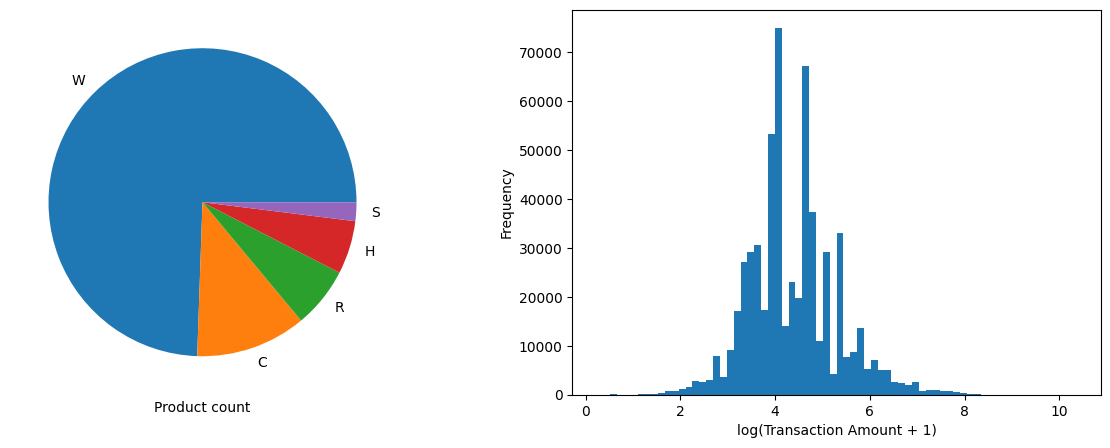

In [ ]:
fix, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

product_count = train_transaction["ProductCD"].value_counts()
axes[0].pie(product_count.values, labels=product_count.index)
axes[0].set_xlabel("Product count")

log_amt = np.log1p(train_transaction["TransactionAmt"])
axes[1].hist(log_amt, bins=70)
axes[1].set_xlabel("log(Transaction Amount + 1)")
axes[1].set_ylabel("Frequency")

In [ ]:
train_transaction["TransactionDT"].describe()

count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64

In [ ]:
print(
    f"TransactionDT in days\nMin: {train_transaction['TransactionDT'].min()/(60*60*24)}\nMax: {train_transaction['TransactionDT'].max()/(60*60*24)}"
)

TransactionDT in days
Min: 1.0
Max: 182.99920138888888


In [7]:
train_df = pd.merge(train_transaction, train_identity, how="left")
test_df = pd.merge(test_transaction, test_identity, how="left")

In [9]:
one_value_cols_train = [col for col in train_df.columns if train_df[col].nunique() <= 1]
one_value_cols_test = [col for col in test_df.columns if test_df[col].nunique() <= 1]

print(
    f"Number of columns in train with one unique value: {len(one_value_cols_train)}\nNumber of columns in test with one unique value: {len(one_value_cols_test)}"
)
print(one_value_cols_train, one_value_cols_test)

Number of columns in train with one unique value: 1
Number of columns in test with one unique value: 1
['V107'] ['V107']


Continuous values

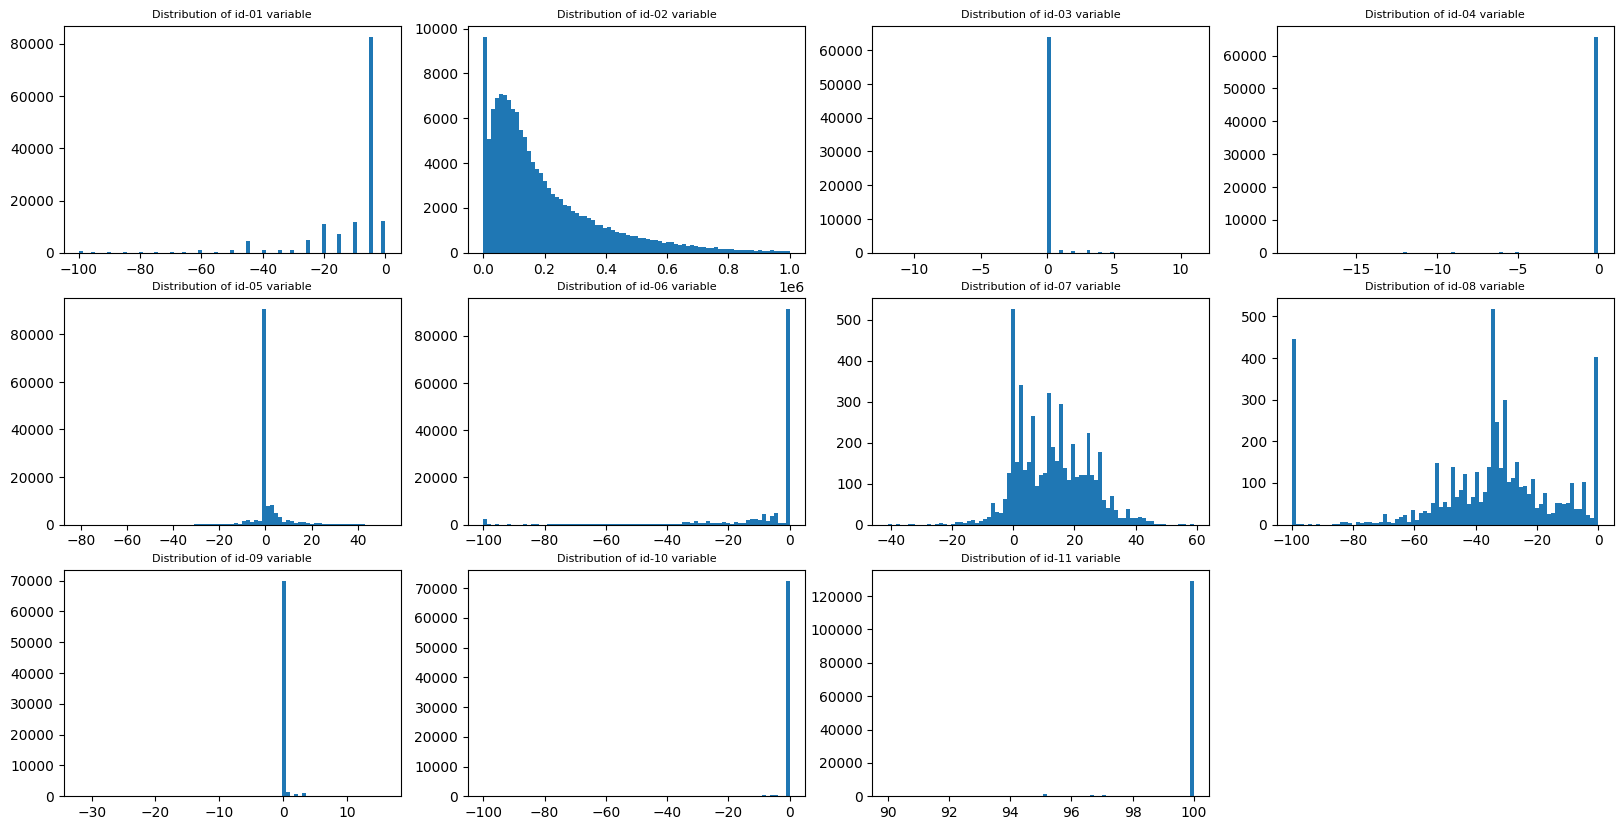

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
id_names = [f"id-0{i}" if i < 10 else f"id-{i}" for i in range(1, 12)]
idx = 0
for i in range(3):
    for j in range(4):
        if idx >= len(id_names):
            axes[i][j].set_visible(False)
            break
        var_name = id_names[idx]
        axes[i][j].hist(train_df[var_name], bins=77)
        axes[i][j].set_title(f"Distribution of {var_name} variable", fontsize=8)
        idx += 1